# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [0]:
# Initialize the random number generator
import random
random.seed(0)

import warnings
warnings.filterwarnings("ignore")

In [0]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

Let's visualize some numbers using matplotlib

Label: 0


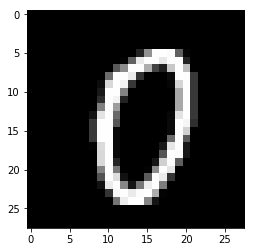

In [191]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [0]:
dataset1 =[]
for i in range(60000):
  if y_train[i] >=0 and y_train[i] <=4:
    dataset1.append(y_train[i])
  

In [0]:
dataset2 = np.empty([60000,28,28])
for i in range(60000):
  if y_train[i] >=5 and y_train[i]<=9:
    dataset2[i] = y_train[i]
  

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [0]:
dataset1=np.asarray(dataset1)


In [195]:
dataset1.shape

(30596,)

## Question 3

### Reshape data
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train =X_train.reshape(X_train.shape[0],28,28,1).astype('float32') 
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

## Question 4

### Normalize data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train/=255
X_test/=255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [198]:
print(X_train.shape)
print(X_train.shape[0])
print(X_test.shape[0])

(60000, 28, 28, 1)
60000
10000


## Question 5

### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
import keras

In [0]:
y_train = keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [0]:
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
import keras
import tensorflow as tf
from keras.utils import np_utils


In [0]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)
model.add(tf.keras.layers.Dropout(0.2))


## Question 7

### Add classification layers
- do this after doing question 7
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [203]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
dropout_3 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               3211392   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 3,222,250
Trainable params: 3,222,250
Non-trainable params: 0
____________________________________________

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

In [205]:

epochs = 10

model.fit(X_train, y_train,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3468 - acc: 0.8991 - val_loss: 0.1483 - val_acc: 0.9560
Epoch 2/10
60000/60000 [==============================] - 8s 125us/sample - loss: 0.1477 - acc: 0.9561 - val_loss: 0.1154 - val_acc: 0.9640
Epoch 3/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.1086 - acc: 0.9675 - val_loss: 0.0948 - val_acc: 0.9700
Epoch 4/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0864 - acc: 0.9732 - val_loss: 0.0865 - val_acc: 0.9722
Epoch 5/10
60000/60000 [==============================] - 7s 124us/sample - loss: 0.0725 - acc: 0.9778 - val_loss: 0.0741 - val_acc: 0.9761
Epoch 6/10
60000/60000 [==============================] - 7s 123us/sample - loss: 0.0622 - acc: 0.9806 - val_loss: 0.0665 - val_acc: 0.9806
Epoch 7/10
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0528 - acc: 0.9836 - val_l

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [206]:
print(model.evaluate(X_test,y_test))

10000/10000 [==============================] - 1s 65us/sample - loss: 0.0547 - acc: 0.9821
[0.05465013315572869, 0.9821]


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [0]:
y_train = keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [0]:
X_train =X_train.reshape(X_train.shape[0],28,28,1).astype('float32') 
X_test = X_test.reshape(X_test.shape[0],28,28,1).astype('float32')

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [0]:
X_train/=255
X_test/=255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [183]:
print(X_train.shape)
print(X_train.shape[0])
print(X_test.shape[0])

(60000, 28, 28, 1)
60000
10000


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [0]:
y_train = keras.utils.to_categorical(y_train,10)
y_test= keras.utils.to_categorical(y_test,10)

In [0]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer='sgd',
              metrics=['accuracy'])

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [209]:

epochs = 10

model.fit(X_train, y_train,
          epochs=epochs,
          batch_size=128,
          verbose=1,
          validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0236 - acc: 0.9935 - val_loss: 0.0480 - val_acc: 0.9839
Epoch 2/10
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0211 - acc: 0.9944 - val_loss: 0.0490 - val_acc: 0.9837
Epoch 3/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0202 - acc: 0.9947 - val_loss: 0.0484 - val_acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0195 - acc: 0.9950 - val_loss: 0.0490 - val_acc: 0.9831
Epoch 5/10
60000/60000 [==============================] - 2s 40us/sample - loss: 0.0195 - acc: 0.9948 - val_loss: 0.0481 - val_acc: 0.9840
Epoch 6/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0186 - acc: 0.9952 - val_loss: 0.0475 - val_acc: 0.9839
Epoch 7/10
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0180 - acc: 0.9956 - val_loss: 0.

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [210]:
print(model.evaluate(X_test,y_test))

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0482 - acc: 0.9834
[0.04820268007465056, 0.9834]


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [61]:
import pandas as pd
import re
from tqdm import tqdm

In [239]:
df=pd.read_csv("E:/great/tweets.csv",encoding = 'latin')

### Drop null values
- drop all the rows with null values

In [240]:
df.dropna(inplace=True)

### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [241]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [242]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [243]:
preprocessed_text=[]
for sent in tqdm(df['tweet_text']):
    sent = sent.lower()
    sent = re.sub('[^A-Za-z0-9#+_]+', ' ', sent)
    sent = ' '.join(f for f in sent.split() if f not in stopwords)
    preprocessed_text.append(sent)

100%|███████████████████████████████████████████████████████████████████████████| 3291/3291 [00:00<00:00, 11277.09it/s]


print dataframe

In [244]:
preprocessed_text[0:1000]

['wesley83 3g iphone 3 hrs tweeting #rise_austin dead need upgrade plugin stations #sxsw',
 'jessedee know fludapp awesome ipad iphone app likely appreciate design also giving free ts #sxsw',
 'swonderlin not wait #ipad 2 also sale #sxsw',
 'sxsw hope year festival crashy year iphone app #sxsw',
 'sxtxstate great stuff fri #sxsw marissa mayer google tim reilly tech books conferences amp matt mullenweg wordpress',
 '#sxsw starting #ctia around corner #googleio hop skip jump good time #android fan',
 'beautifully smart simple idea rt madebymany thenextweb wrote #hollergram ipad app #sxsw http bit ly ieavob',
 'counting days #sxsw plus strong canadian dollar means stock apple gear',
 'excited meet samsungmobileus #sxsw show sprint galaxy still running android 2 1 #fail',
 'find amp start impromptu parties #sxsw hurricaneparty http bit ly gvlrin wait til android app comes',
 'foursquare ups game time #sxsw http j mp grn7pk still prefer gowalla far best looking android app date',
 'gotta lo

In [245]:
df["clean_text"] = preprocessed_text

In [246]:
df.drop(['tweet_text'], axis=1, inplace=True)


## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

In [247]:
df=df[((df['is_there_an_emotion_directed_at_a_brand_or_product'].values=='Positive emotion') | (df['is_there_an_emotion_directed_at_a_brand_or_product'].values=='Negative emotion'))]

In [248]:
df.shape

(3191, 3)

In [249]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [250]:
df['is_there_an_emotion_directed_at_a_brand_or_product'] = df['is_there_an_emotion_directed_at_a_brand_or_product'].map({'Positive emotion': 1, 'Negative emotion': 0})

In [251]:
df['is_there_an_emotion_directed_at_a_brand_or_product']=df['is_there_an_emotion_directed_at_a_brand_or_product'].astype(int)

In [252]:
df.head()

,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,clean_text
0,iPhone,0,wesley83 3g iphone 3 hrs tweeting #rise_austin...
1,iPad or iPhone App,1,jessedee know fludapp awesome ipad iphone app ...
2,iPad,1,swonderlin not wait #ipad 2 also sale #sxsw
3,iPad or iPhone App,0,sxsw hope year festival crashy year iphone app...
4,Google,1,sxtxstate great stuff fri #sxsw marissa mayer ...


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [253]:
X = df['clean_text']
y=df['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [254]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [255]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

In [256]:
vectorizer_bow_essay = CountVectorizer(ngram_range=(1,3), min_df=10, max_features =10000)

vectorizer_bow_essay.fit(X_train)

text_bow_train = vectorizer_bow_essay.transform(X_train)

print("Shape of matrix after one hot encoding ",text_bow_train.shape)

Shape of matrix after one hot encoding  (2393, 698)


In [257]:
text_bow_test = vectorizer_bow_essay.transform(X_test)
print("Shape of matrix after one hot encoding ",text_bow_test.shape)

Shape of matrix after one hot encoding  (798, 698)


## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [259]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

### Fit the classifer
- fit logistic regression classifier

In [260]:
logistic_model.fit(text_bow_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [263]:
from sklearn.naive_bayes import MultinomialNB
clf1 = MultinomialNB()

### Fit the classifer
- fit logistic regression classifier

In [264]:
clf1.fit(text_bow_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [266]:
ypred1 = clf.predict(text_bow_test) 

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [267]:
ypred2 = clf1.predict(text_bow_test)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [273]:
clf.score(text_bow_test,ypred1)

1.0

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [274]:
clf1.score(text_bow_test,ypred2)

1.0